In [1]:
import cv2
from keras.models import load_model
import imutils
from imutils.contours import sort_contours
import matplotlib.pyplot as plt
import numpy as np


# render image
def cv2_imshow(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)


PATH = 'models/mymodels/handwriting.model'

model = load_model(PATH)

2022-12-07 15:34:03.959903: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-07 15:34:04.070610: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ciheul/Projects/ml/env/lib/python3.10/site-packages/cv2/../../lib64:
2022-12-07 15:34:04.070630: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-07 15:34:04.737758: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.

12


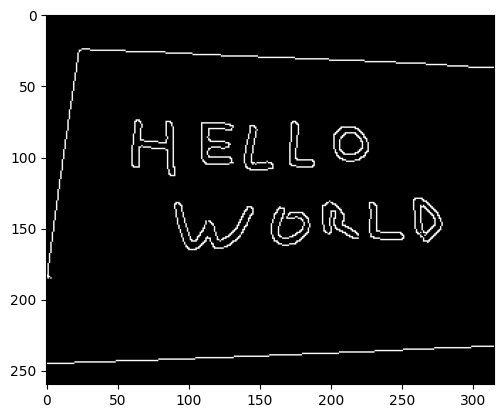

In [2]:
IMAGE_PATH = 'images/objects/handwritten.jpg'

image = cv2.imread(IMAGE_PATH)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
canny = cv2.Canny(blur, 30, 150)
cv2_imshow(canny)

contours = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL,
                            cv2.CHAIN_APPROX_SIMPLE)
print(len(contours[0]))
contours = imutils.grab_contours(contours)
contours = sort_contours(contours, method='left-to-right')[0]

In [3]:
chars = []

for c in contours:
    (x, y, w, h) = cv2.boundingRect(c)

    # filter out bounding boxes, ensuring they are neither too small
	# nor too large
    if (w >= 5 and w <= 100) and (h >= 15 and h <= 120):
        # get a part of image (which is the characters)
        roi = gray[y:y+h, x:x+w]

        # apply threshold
        ret, thresh = cv2.threshold(roi, 0, 255,
                                    cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
        
        (t_h, t_w) = thresh.shape
        if t_w > t_h:
            thresh = imutils.resize(thresh, width=32)
        else:
            thresh = imutils.resize(thresh, height=32)
        
        (t_h, t_w) = thresh.shape
        d_x = int(max(0, 32 - t_w) / 2.0)
        d_y = int(max(0, 32 - t_h) / 2.0)

        padded = cv2.copyMakeBorder(thresh, top=d_y, bottom=d_y, left=d_x,
                                    right=d_x, borderType=cv2.BORDER_CONSTANT,
                                    value=(0, 0, 0))
        padded = cv2.resize(padded, (32, 32))
        
        padded = padded.astype('float32') / 255.0
        padded = np.expand_dims(padded, axis=-1)

        chars.append((padded, (x, y, w, h)))

0 233 315 13
0 24 315 162
60 74 31 40
90 132 56 34
109 76 23 30
139 78 21 32
158 135 28 28
171 75 18 33
194 131 26 27
202 79 25 25
227 132 25 27
258 129 21 32


In [4]:
boxes = [b[1] for b in chars]
for c in chars:
    print(c[0])
chars = np.array([c[0] for c in chars], dtype='float32')

preds = model.predict(chars)

label_names = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"
label_names = [l for l in label_names]

for (pred, (x, y, w, h)) in zip(preds, boxes):
    i = np.argmax(pred)
    prob = pred[i]
    label = label_names[i]

    print("[INFO] {} - {:.2f}%".format(label, prob*100))
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(image, label, (x-10, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1.2, 
                (0, 255, 0), 2)
    
cv2.imshow("Image", image)
cv2.waitKey(0)

[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]
[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]
[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]
[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.